# Credit Scoring Model

**Credit scoring model to predict the creditworthiness of individuals based on historical financial data. Utilize classification algorithms and assess the model's accuracy.**

## 1- Importing Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import re

## 2- Preprocess the Data

In [2]:
# Load Data from CSV file
dataset = pd.read_csv('Data.csv')

In [3]:
# Dataset shape
dataset.shape

(3000, 30)

In [4]:
# Discover any missing values
dataset.isnull().sum()

TARGET               0
ID                   0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [5]:
# Convert the strings to numeriacal data
def clean_and_convert(value):
    if isinstance(value, str):
        value = value.replace('$', '').replace(',', '').replace('%', '').strip()
        return float(value)
    return value

# Apply the cleaning function to specific columns
columns_to_clean = ["TLSum", "TLMaxSum", "TLBalHCPct", "TLSatPct", "TLOpenPct", "TLOpen24Pct"]
for col in columns_to_clean:
    dataset[col] = dataset[col].apply(clean_and_convert)

In [6]:
# Replance the missing values with the mean of the column
dataset = dataset.fillna(dataset.mean())

# Recheck for missing values
dataset.isnull().sum()

TARGET             0
ID                 0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [7]:
print(dataset.shape)

(3000, 30)


## 3- Model Training

In [8]:
# Now we normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(dataset)
data_scaled = pd.DataFrame(data_scaled, columns=dataset.columns)

def clean_feature_names(df):
    df.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in df.columns]
    return df


df = clean_feature_names(data_scaled)
data_scaled.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1.0,0.004081,0.058824,0.06,0.0,0.100,0.000000,0.104167,0.119741,0.078947,...,0.130435,0.273810,0.21,0.250,0.157895,0.155556,0.21,0.085106,0.20,0.000000
1,1.0,0.004714,0.294118,0.18,0.0,0.075,0.041667,0.062500,0.008630,0.040936,...,0.043478,0.238095,0.00,0.000,0.000000,0.000000,1.00,0.255319,0.00,0.166667
2,1.0,0.005845,0.000000,0.00,0.0,0.025,0.208333,0.020833,0.375405,0.020468,...,0.217391,0.107143,0.65,0.000,0.052632,0.022222,0.73,0.021277,0.05,0.088333
3,1.0,0.008771,0.156863,0.10,0.0,0.150,0.041667,0.208333,0.010787,0.011696,...,0.130435,0.270833,0.25,0.125,0.052632,0.022222,0.75,0.148936,0.05,0.221667
4,1.0,0.010337,0.058824,0.02,0.0,0.225,0.000000,0.166667,0.133765,0.152047,...,0.043478,0.372024,0.00,0.000,0.052632,0.088889,0.14,0.063830,0.05,0.000000


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled.drop('TARGET', axis=1), data_scaled['TARGET'], test_size=0.2, random_state=0)

In [10]:
# Create and fit the models
model1 = RandomForestClassifier(n_estimators=1000, random_state=42)
model1.fit(X_train, y_train)

model2 = LogisticRegression(random_state=42)
model2.fit(X_train, y_train)

model3 = SVC(random_state=42)
model3.fit(X_train, y_train)

model4 = KNeighborsClassifier()
model4.fit(X_train, y_train)

model5 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model5.fit(X_train, y_train)

model6 = xgb.XGBClassifier(n_estimators=100, random_state=42)
model6.fit(X_train, y_train)

model7 = lgb.LGBMClassifier(n_estimators=100, random_state=42)
model7.fit(X_train, y_train)

model8 = GaussianNB()
model8.fit(X_train, y_train)

model9 = MLPClassifier(random_state=42)
model9.fit(X_train, y_train)

model10 = AdaBoostClassifier(n_estimators=100, random_state=42)
model10.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 398, number of negative: 2002
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1855
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.165833 -> initscore=-1.615450
[LightGBM] [Info] Start training from score -1.615450


/home/alpha/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/alpha/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

## 4- Model Evaluation

In [11]:
models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10]
accuracy = [accuracy_score(y_test, model.predict(X_test)) for model in models]


# Create a dictionary of model names and their accuracies
accuracies = {
    'RandomForest': accuracy[0],
    'LogisticRegression': accuracy[1],
    'SVM': accuracy[2],
    'KNN': accuracy[3],
    'GradientBoosting': accuracy[4],
    'XGBoost': accuracy[5],
    'LightGBM': accuracy[6],
    'NaiveBayes': accuracy[7],
    'NeuralNetwork': accuracy[8],
    'AdaBoost': accuracy[9]
}

In [12]:
results_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])          # Convert to a dataframe

In [13]:
results_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
results_table = results_df.sort_values(by='Accuracy', ascending=False)
print(results_table)

                Model  Accuracy
6            LightGBM  0.845000
1  LogisticRegression  0.831667
2                 SVM  0.831667
4    GradientBoosting  0.831667
8       NeuralNetwork  0.830000
0        RandomForest  0.828333
9            AdaBoost  0.828333
3                 KNN  0.820000
5             XGBoost  0.816667
7          NaiveBayes  0.766667


/tmp/ipykernel_28629/3946663133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


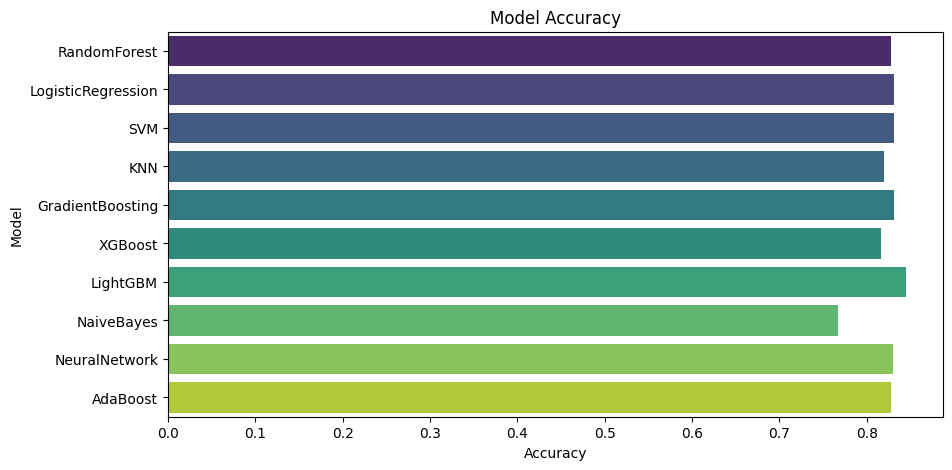

In [14]:
# plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()